### Overview

[**Black Friday Sales**](https://www.kaggle.com/c/gb-black-friday-sales)  
In this competition your task will be to predict the purchase amount in test.csv. You will be given two datasets: train.csv (contains all features and Purchase) and test.csv (only features).

### Data fields

* `User_ID` - идентификационный номер покупателя
* `Product_ID` - идентификационный номер товара
* `Gender` - пол покупателя 
* `Age` - возраст покупателя
* `Occupation` - род деятельности покупателя
* `City_Category` - город проживания
* `Stay_In_Current_City_Years` - как долго покупатель живет в этом городе
* `Marital_Status` - семейное положение покупателя
* `Product_Category_1` - категория товара 1
* `Product_Category_2` - категория товара 2
* `Product_Category_3` - категория товара 3

**Целевая переменная**

* `Purchase` - сумма покупок

**Метрика качества**

* `R2` - The evaluation metric is Coefficient of determination (sklearn.metrics.r2_score)

### File descriptions

* `train.csv` - the training set
* `test.csv` - the test set

### Подключение библиотек и загрузка данных

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pylab import rcParams
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score

import warnings
warnings.filterwarnings('ignore')

rcParams["figure.figsize"] = 9, 6
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
def get_features(features):
    for feature in features:
        print(f"\n{feature}:\n \n{df_train[feature].value_counts()}" + '\n' + '*'*50)

In [4]:
TRAIN_DATASET_PATH='train.csv'
TEST_DATASET_PATH='test.csv'
PREPARED_TRAIN_DATASET_PATH='train_prepared.csv'
PREPARED_TEST_DATASET_PATH='test_prepared.csv'

In [5]:
df_train = pd.read_csv(TRAIN_DATASET_PATH)
df_test = pd.read_csv(TEST_DATASET_PATH)

In [6]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1004085,P00075742,F,26-35,6,A,1,0,8,14.0,NaN,7803
1,1005491,P00234842,M,18-25,7,A,1,0,5,6.0,16.0,6903
2,1003499,P00220142,M,26-35,3,A,2,0,1,15.0,NaN,15773
3,1000097,P00211242,F,36-45,3,C,3,0,8,12.0,NaN,8116
4,1005802,P00327142,F,26-35,0,A,4+,0,8,15.0,NaN,6144


### Обзор данных

In [6]:
df_train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,8.000000e+04,80000.000000,80000.000000,80000.000000,54892.000000,24331.000000,80000.000000
mean,1.003023e+06,8.086863,0.409388,5.388463,9.851873,12.676421,9243.933162
std,1.728959e+03,6.536459,0.491724,3.922793,5.079163,4.109343,5021.298356
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001503e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5679.750000
50%,1.003067e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8039.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12046.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     80000 non-null  int64  
 1   Product_ID                  80000 non-null  object 
 2   Gender                      80000 non-null  object 
 3   Age                         80000 non-null  object 
 4   Occupation                  80000 non-null  int64  
 5   City_Category               80000 non-null  object 
 6   Stay_In_Current_City_Years  80000 non-null  object 
 7   Marital_Status              80000 non-null  int64  
 8   Product_Category_1          80000 non-null  int64  
 9   Product_Category_2          54892 non-null  float64
 10  Product_Category_3          24331 non-null  float64
 11  Purchase                    80000 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 7.3+ MB


In [8]:
target = 'Purchase'
features = list(df_train.columns)[:-1]

* **Обзор целевой переменной**

* `Purchase`  - 80000 значений. среднее значение ~ 9244. Стандартное отклонение ~ 5021. Видно, что есть слишком большие и слишком маленькие значения. Нужно строить график распределения и делать оценку, исходя из других признаков 

In [9]:
purchase = df_train[target]
purchase.mean() - purchase.std(), purchase.mean() + purchase.std()

(4222.634806164755, 14265.231518835244)

In [10]:
purchase.value_counts()

7075     38
6949     37
7951     35
8032     35
6884     34
         ..
17149     1
21311     1
14088     1
9137      1
9686      1
Name: Purchase, Length: 13314, dtype: int64

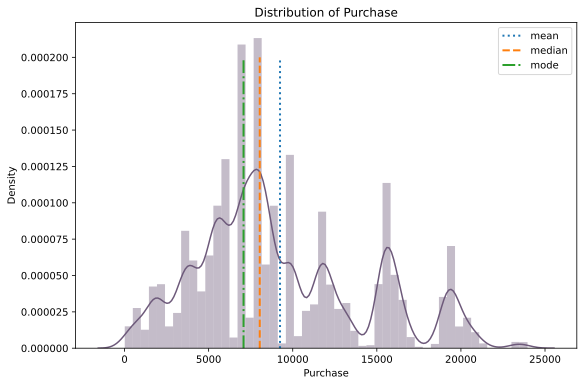

(9243.9331625, 8039.0, 7075)

In [11]:
plt.figure(figsize = (9, 6))

sns.distplot(purchase, color='#6D597A')

y = np.linspace(0, 0.000200, 100)
plt.plot([purchase.mean()] * 100, y, label='mean', linestyle=':', linewidth=2)
plt.plot([purchase.median()] * 100, y, label='median', linestyle='--', linewidth=2)
plt.plot([purchase.mode()[0]] * 100, y, label='mode', linestyle='-.', linewidth=2)

plt.title('Distribution of Purchase')
plt.legend()
plt.show()

purchase.mean(), purchase.median(), purchase.mode()[0]

Видно, график распределен неравномерно, но наблюдаются несколько групп значений. Может сумма товаров зависит от заказанных категорий.

* **Обзор признаков** 

In [12]:
get_features(features)


User_ID:
 
1004277    144
1001680    141
1001181    133
1001150    127
1001088    124
          ... 
1005199      1
1002709      1
1004920      1
1005637      1
1002287      1
Name: User_ID, Length: 5763, dtype: int64
**************************************************

Product_ID:
 
P00265242    272
P00025442    225
P00112142    224
P00058042    221
P00110742    220
            ... 
P00242242      1
P00316042      1
P00310442      1
P00208642      1
P00026842      1
Name: Product_ID, Length: 3256, dtype: int64
**************************************************

Gender:
 
M    60068
F    19932
Name: Gender, dtype: int64
**************************************************

Age:
 
26-35    32067
36-45    16025
18-25    14286
46-50     6777
51-55     5555
55+       3110
0-17      2180
Name: Age, dtype: int64
**************************************************

Occupation:
 
4     10443
0     10188
7      8474
1      6921
17     5815
20     4887
12     4559
14     4030
2      3849
16     372

* `User_ID` - идентификационный номер покупателя. Видно, что есть пользователи, которые делают много покупок, и есть такие, которые сделали только одну покупку. Можно выделить постоянных покупателей  
* `Product_ID` - идентификационный номер товара. Похожий признак, есть популярные товары, которые покупают чаще всего, а есть товары, которые покупают реже  
* `Gender` - пол покупателя. Мужчины делают покупки чаще, чем женщины. Возможно, какой-то специфический магазин (например, автозапчасти или что-то подобное)  
* `Age` - возраст покупателя. Видно, что пользователи разбиты на 7 групп, видно, что наиболее частые покупатели - люди от 26 до 35, и реже всего покупают дети до 17 лет
* `Occupation` - род деятельности покупателя - признак состоит из большого количества категорий, чаще всего встречаются категории 4, 0, 7, реже всего - 18, 9, 8   
* `City_Category` - категория города (скорее всего, разбитые по численности населения). Самая популярная категория - "В"  
* `Stay_In_Current_City_Years` - как долго покупатель живет в этом городе. Чаще всего покупают люди, которые живут в городе 1 год
* `Marital_Status` - семейное положение покупателя. Больше всего значений в категории 0

Кадому товару присвоены по три категории, скорее всего нули - это отсутствие второй и третьей категории. Об этом говорит количество пропусков в третьей категории, их больше, чем во второй, а в первой нет пропусков вообще. Скорее всего в магазине всего 20 категорий товаров
* `Product_Category_1` - категория товара 1   
* `Product_Category_2` - категория товара 2  - Очень много нулей (больше половины) 
* `Product_Category_3` - категория товара 3 - Тоже очень много нулей

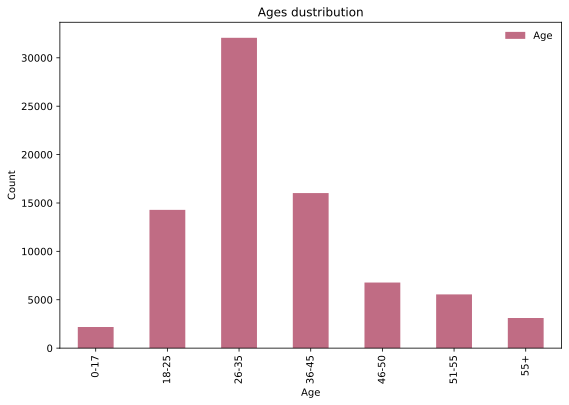

In [49]:
plt.figure(figsize = (9, 6))

df_train['Age'].value_counts().sort_index().plot(kind='bar', label='Age', color='#c06c84', linewidth = 2)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Ages dustribution')
plt.tick_params(axis='both', which='major', labelsize=10)
plt.legend(frameon=False)

plt.show()

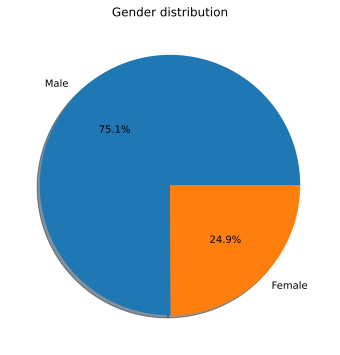

In [12]:
gender = df_train['Gender'].value_counts()
plt.figure(figsize = (9, 6))
plt.pie(gender.values, labels=['Male', 'Female'], autopct='%1.1f%%', shadow=True)
plt.title('Gender distribution')
plt.show()

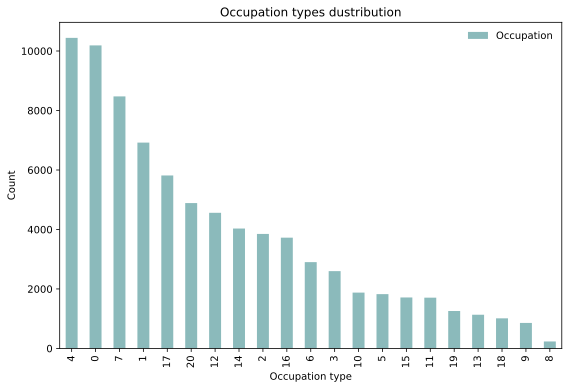

In [50]:
plt.figure(figsize = (9, 6))

df_train['Occupation'].value_counts().plot(kind='bar', label='Occupation', color='#8bbabb', linewidth = 2)
plt.xlabel('Occupation type')
plt.ylabel('Count')
plt.title('Occupation types dustribution')
plt.tick_params(axis='both', which='major', labelsize=10)
plt.legend(frameon=False)

plt.show()

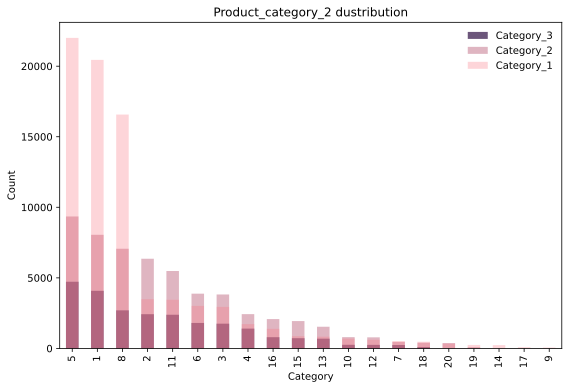

In [47]:
plt.figure(figsize = (9, 6))

df_train['Product_Category_3'].value_counts().plot(kind='bar', label='Category_3', color='#6c567b', linewidth = 2)
df_train['Product_Category_2'].value_counts().plot(kind='bar', label='Category_2', color='#c06c84', linewidth = 2, alpha=0.5)
df_train['Product_Category_1'].value_counts().plot(kind='bar', label='Category_1', color='#f67280', linewidth = 2, alpha=0.3)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Product_category_2 dustribution')
plt.tick_params(axis='both', which='major', labelsize=10)
plt.legend(frameon=False)

plt.show()

In [22]:
category_1 = df_train['Product_Category_1'].value_counts().sort_index().values
category_1

array([20446,  3487,  2945,  1719, 22009,  3015,   518, 16576,    60,
         697,  3447,   615,   830,   234,   865,  1389,    87,   475,
         244,   342])

In [27]:
df_train[df_train['User_ID'] == 1004277]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
109,1004277,P00233042,M,36-45,16,A,0,0,1,8.0,NaN,15718
621,1004277,P00001442,M,36-45,16,A,0,0,8,NaN,NaN,7790
1074,1004277,P00196342,M,36-45,16,A,0,0,2,9.0,14.0,12793
1666,1004277,P00258742,M,36-45,16,A,0,0,5,NaN,NaN,8783
1723,1004277,P00032942,M,36-45,16,A,0,0,15,16.0,NaN,17110
...,...,...,...,...,...,...,...,...,...,...,...,...
78270,1004277,P00116742,M,36-45,16,A,0,0,11,NaN,NaN,7553
78487,1004277,P00162242,M,36-45,16,A,0,0,1,8.0,NaN,15221
78711,1004277,P00173142,M,36-45,16,A,0,0,1,5.0,6.0,15256
79217,1004277,P00371644,M,36-45,16,A,0,0,20,NaN,NaN,126


In [48]:
categories = df_train[['Product_ID', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']]
categories


,Product_ID,Product_Category_1,Product_Category_2,Product_Category_3
0,P00075742,8,14.0,NaN
1,P00234842,5,6.0,16.0
2,P00220142,1,15.0,NaN
3,P00211242,8,12.0,NaN
4,P00327142,8,15.0,NaN
...,...,...,...,...
79995,P00217942,5,NaN,NaN
79996,P00255742,3,4.0,NaN
79997,P00209842,5,8.0,NaN
79998,P00171842,8,14.0,NaN


Можно будет сгруппировать похожие категории, посмотреть, сгруппировать разные признаки пользователей по категориям, которые они заказывают.  
Нули здесь означают, что категорий не 3, а либо 2, либо одна, по-этому их заполнение чем-то не даст скорее всего никакого результата

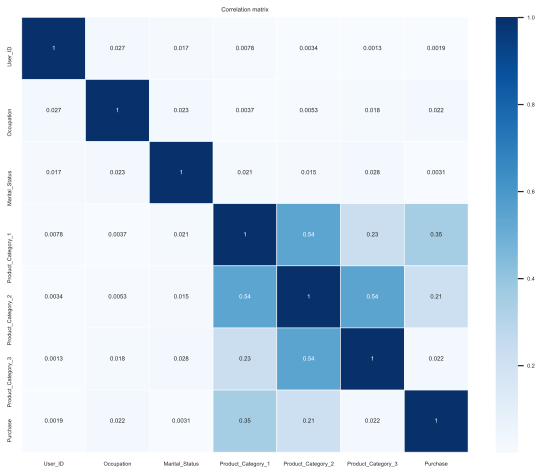

In [52]:
df_train.corr()
plt.figure(figsize=(10,8))

sns.set(font_scale=0.5)
sns.heatmap(df_train.corr().abs(), annot=True, linewidth=.5, cmap='Blues')
plt.title('Correlation matrix')
plt.show()

В первоначальном датасете довольно сложно оценить линейную связь, будет более информативно после обработки. В категориях подтверждается догадка о том, что максимальное количество категорий у одного продукта может быть три, если в остальных нули, следовательно, товар относится только к одной категории

### Обработка признаков

* `User_ID` - в str, из него сделать: 
    - общее количество заказов для каждого пользователя
    - стоимость всех заказов заказов
    - разделить пользователей по частоте заказов
* `Product_ID` - в str, из него сделать:
    - количество заказанных позиций товара
    - суммарную цену заказанных 
    - попробовать посчитать стоимость товара
    - разделить товары по частоте покупки
* `Gender` - Binnary
* `Age` - Label Encoding
* `Occupation` - посмотреть, как делала в задаче классификации
* `City_Category`
* `Product_Category_1, 2, 3` 
    - мб Label Encoding, 
    - мб сделать конкат и закодировать в значения от [0, 1]
    - сгруппировать по частоте, чтобы сделать меньше категорий
    - сделать столбец общего количества категорий
* `Stay_In_Current_City_Years` - Label Encoding
* `Marital_Status` - 


In [14]:
df_train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

### Предобработка данных

Разобьем тренировочный датасет на 2 набора - тренировочный и валидационный

In [ ]:
df_train, df_valid = train_test_split(df_train, shuffle=True, test_size=0.3, random_state=42)

In [ ]:
df_valid.info()

* `User_ID` - колонку сделаем строкой, из нее добавим новою колонку - UserOrdersCount

In [ ]:
df_train['User_ID'] = df_train['User_ID'].astype(str)
df_valid['User_ID'] = df_valid['User_ID'].astype(str)
df_test['User_ID'] = df_test['User_ID'].astype(str)

* `Product_ID` - колонку сделаем строкой, из нее добавим новою колонку - ProductOrdersCount

In [ ]:
df_train['Product_ID'] = df_train['Product_ID'].astype(str)
df_valid['Product_ID'] = df_valid['Product_ID'].astype(str)
df_test['Product_ID'] = df_test['Product_ID'].astype(str)

* `Gender` - переведем в биннарный признак

In [ ]:
df_train['Gender'].value_counts()

In [ ]:
* `Age`
* `Occupation`
* `City_Category`
* `Stay_In_Current_City_Years`
* `Marital_Status`
* `Product_Category_1`, `Product_Category_2`, `Product_Category_3`

In [ ]:
### Генерация новых признаков

* `UserOrdersCount` - суммарное количество заказов каждого пользователя

In [ ]:
UserOrdersCount = df_train['User_ID'].value_counts().reset_index()\
               .rename(columns={'index':'User_ID', 'User_ID':'UserOrdersCount'})

df_train = df_train.merge(UserOrdersCount, on='User_ID', how='left')

df_valid = df_valid.merge(UserOrdersCount, on='User_ID', how='left')
df_valid['UserOrdersCount'].fillna(0, inplace=True)

df_test = df_test.merge(UserOrdersCount, on='User_ID', how='left')
df_test['UserOrdersCount'].fillna(0, inplace=True)

* `ProductOrdersCount` - сумма заказанных товаров

In [ ]:
ProductOrdersCount = df_train['Product_ID'].value_counts().reset_index()\
               .rename(columns={'index':'Product_ID', 'Product_ID':'ProductOrdersCount'})

df_train = df_train.merge(ProductOrdersCount, on='Product_ID', how='left')

df_valid = df_valid.merge(ProductOrdersCount, on='Product_ID', how='left')
df_valid['ProductOrdersCount'].fillna(0, inplace=True)

df_test = df_test.merge(ProductOrdersCount, on='Product_ID', how='left')
df_test['ProductOrdersCount'].fillna(0, inplace=True)

In [ ]:
df_test.tail(4)

In [ ]:
df_test.info()